In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [36]:
path_sf = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\IBGE\BR_RG_Imediatas_2023\BR_RG_Imediatas_2023.shp'
geo_df = gpd.read_file(path_sf)
geo_df = geo_df.loc[geo_df['NM_UF'] == 'São Paulo']

In [37]:
dir_path = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Results'
name_path = 'results.csv'
complete_path = os.path.join(dir_path, name_path)

In [38]:
dir = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Dados Gerados Mestrado\Auxiliar'
df_dist_ZD_PA = pd.read_csv(os.path.join(dir, 'df_dist_ZD_PA.csv'))

In [39]:
def criar_excel(df, criar_novo=0, path=rf"C:\Users\rpafe\Desktop\dados_exportados.xlsx"):
    # Se criar_novo for 1 ou o arquivo não existir, cria um novo arquivo
    if criar_novo == 1 or not os.path.exists(path):
        mode = "w"
    else:
        mode = "a"

    with pd.ExcelWriter(path, mode=mode) as writer:
        # Obtendo o número da última sheet e incrementando (somente no modo 'a')
        if mode == "a":
            numsht = len(writer.book.sheetnames) + 1 if writer.book.sheetnames else 1
        else:
            numsht = 1  # Começa do primeiro se for um novo arquivo

        df.to_excel(writer, sheet_name=f"Sheet{numsht}")

    print(f"Arquivo Excel atualizado! {'Novo arquivo criado.' if criar_novo == 1 else 'Nova sheet adicionada.'}")


In [40]:
df = pd.read_csv(complete_path, encoding='latin1', sep=',')   

meses_dict = {
    0: '01-Jan', 1: '02-Fev', 2: '03-Mar', 3: '04-Abr', 
    4: '05-Mai', 5: '06-Jun', 6: '07-Jul', 7: '08-Ago', 
    8: '09-Set', 9: '10-Out', 10: '11-Nov', 11: '12-Dez'
}
df['Mes'] = df['Tempo'].apply(lambda x: meses_dict[x])

In [41]:
# df_fab = df.loc[df['Ref']=='Fabrica',:].groupby(['Ref', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
#     applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)
# criar_excel(df_fab, criar_novo=1, path=rf"C:\Users\rpafe\Desktop\dados_exportados.xlsx")

# df_fab

In [42]:
df.loc[df['Ref'] == 'CD'].groupby(['Ref', 'uf_origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes'])['z_w'].max().unstack(level='Mes')

,,,,Mes,01-Jan,02-Fev,03-Mar,04-Abr,05-Mai,06-Jun
Ref,uf_origem,uf_origem,cid_origem,Origem,,,,,,
CD,SP,SP,Americana,CD_0001,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df.loc[df['Ref'] == 'Fabrica', :].groupby(['Ref', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\2141650626.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                      01-Jan  02-Fev  03-Mar  04-Abr  05-Mai  06-Jun
Ref     Origem Abrv Var                                                
Fabrica F_0001 qac            0       0       0       0       0       0
               qfra           0       0       0       0  25,876       0
               qrf            0       0   7,397       0       0       0
               sf        36,958  36,958  44,355  44,355  44,355  44,355
               sfbc      18,479  18,479  18,479  18,479  44,355  44,355
               sfrf      18,479  18,479  25,876  25,876       0       0

In [44]:
df.loc[df['Ref'] == 'CD'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\1038743238.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                                 01-Jan   02-Fev   03-Mar  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0001 SP        Americana  CD_0001 qap             0   10,057   12,243   
                                         qrd             0        0        0   
                                         qrf             0        0    7,397   
                                         sc        142,586  142,428  133,456   
                                         scbp       97,019   90,950   85,636   
                                         scbt        3,987    6,929    7,467   
                                         scrd       13,860   14,850   15,917   
                                         scrf       27,720   29,700   24,436   

Mes                                                 04-Abr   05-Mai   06-Jun  
Ref Origem  uf_origem cid_origem Origem  Abrv Var                             
CD  CD_0001 SP        Americana  CD_0001 qap        21,513    8,956   10,754  
                                         qrd         2,443        0        0  
                                         qrf             0        0        0  
                                         sc        126,629  127,860  117,261  
                                         scbp       71,590   74,625   71,001  
                                         scbt       11,990    7,131      108  
                                         scrd       15,186   16,205   16,221  
                                         scrf       27,862   29,899   29,930

In [45]:
df.loc[df['Ref'] == 'PA'].groupby(['Ref', 'uf_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\3704028293.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                      01-Jan   02-Fev   03-Mar   04-Abr   05-Mai   06-Jun
Ref uf_origem Abrv Var                                                      
PA  SP        qaj        16,765   17,221   21,463   14,596   19,332   17,384
              qrc         5,696    9,899   10,667   17,129   10,187      155
              qrp        14,524   14,925   18,595   12,648   16,745   15,064
              sp        106,975  104,837  103,545  105,981  102,162  110,442
              spbj       53,225   46,061   36,841   43,758   33,382   26,752
              sprc       53,750   58,776   66,704   62,223   68,781   83,690

In [46]:
df.loc[df['Ref'] == 'PA'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes'])['z_w'].max().unstack(level='Mes')

Mes                                                01-Jan  02-Fev  03-Mar  \
Ref Origem  uf_origem cid_origem          Origem                            
PA  PA_0002 SP        Agudos              PA_0002     1.0    -0.0    -0.0   
    PA_0003 SP        Alfredo Marcondes   PA_0003     1.0    -0.0    -0.0   
    PA_0004 SP        Álvares Machado     PA_0004     1.0    -0.0    -0.0   
    PA_0005 SP        Americana           PA_0005     1.0    -0.0    -0.0   
    PA_0006 SP        Américo Brasiliense PA_0006     1.0    -0.0    -0.0   
    PA_0007 SP        Amparo              PA_0007     1.0    -0.0    -0.0   
    PA_0009 SP        Andradina           PA_0009     1.0    -0.0    -0.0   
    PA_0013 SP        Apiaí               PA_0013     1.0    -0.0    -0.0   
    PA_0014 SP        Araçatuba           PA_0014     1.0    -0.0    -0.0   
    PA_0016 SP        Araraquara          PA_0016     1.0    -0.0    -0.0   
    PA_0017 SP        Araras              PA_0017     1.0    -0.0    -0.0   
    PA_0018 SP        Assis               PA_0018     1.0    -0.0    -0.0   
    PA_0019 SP        Avaré               PA_0019     1.0     0.0    -0.0   
    PA_0020 SP        Bady Bassitt        PA_0020     1.0    -0.0    -0.0   
    PA_0021 SP        Bariri              PA_0021     1.0    -0.0    -0.0   
    PA_0023 SP        Barretos            PA_0023     1.0    -0.0    -0.0   
    PA_0024 SP        Barueri             PA_0024     1.0    -0.0    -0.0   
    PA_0026 SP        Batatais            PA_0026     1.0    -0.0    -0.0   
    PA_0027 SP        Bauru               PA_0027     1.0    -0.0    -0.0   
    PA_0028 SP        Bebedouro           PA_0028     1.0    -0.0    -0.0   
    PA_0029 SP        Birigui             PA_0029     1.0    -0.0    -0.0   
    PA_0030 SP        Boituva             PA_0030     1.0    -0.0    -0.0   
    PA_0031 SP        Botucatu            PA_0031     1.0    -0.0    -0.0   
    PA_0032 SP        Bragança Paulista   PA_0032     1.0    -0.0    -0.0   
    PA_0033 SP        Buritama            PA_0033     1.0    -0.0    -0.0   
    PA_0034 SP        Cachoeira Paulista  PA_0034     1.0    -0.0    -0.0   
    PA_0035 SP        Cajati              PA_0035     1.0    -0.0    -0.0   
    PA_0036 SP        Campinas            PA_0036     1.0    -0.0    -0.0   
    PA_0039 SP        Cândido Mota        PA_0039     1.0    -0.0    -0.0   
    PA_0042 SP        Carapicuíba         PA_0042     1.0    -0.0    -0.0   
    PA_0043 SP        Cardoso             PA_0043     1.0    -0.0    -0.0   
    PA_0044 SP        Catanduva           PA_0044     1.0    -0.0    -0.0   
    PA_0047 SP        Cerquilho           PA_0047     1.0    -0.0    -0.0   
    PA_0049 SP        Conchas             PA_0049     1.0    -0.0    -0.0   
    PA_0051 SP        Cotia               PA_0051     1.0    -0.0    -0.0   
    PA_0052 SP        Cravinhos           PA_0052     1.0    -0.0    -0.0   
    PA_0053 SP        Cruzeiro            PA_0053     1.0    -0.0    -0.0   

Mes                                                04-Abr  05-Mai  06-Jun  
Ref Origem  uf_origem cid_origem          Origem                           
PA  PA_0002 SP        Agudos              PA_0002    -0.0    -0.0    -0.0  
    PA_0003 SP        Alfredo Marcondes   PA_0003    -0.0    -0.0    -0.0  
    PA_0004 SP        Álvares Machado     PA_0004    -0.0    -0.0    -0.0  
    PA_0005 SP        Americana           PA_0005    -0.0    -0.0    -0.0  
    PA_0006 SP        Américo Brasiliense PA_0006    -0.0    -0.0    -0.0  
    PA_0007 SP        Amparo              PA_0007    -0.0    -0.0    -0.0  
    PA_0009 SP        Andradina           PA_0009    -0.0    -0.0    -0.0  
    PA_0013 SP        Apiaí               PA_0013    -0.0    -0.0    -0.0  
    PA_0014 SP        Araçatuba           PA_0014    -0.0    -0.0    -0.0  
    PA_0016 SP        Araraquara          PA_0016    -0.0    -0.0    -0.0  
    PA_0017 SP        Araras              PA_0017    -0.0    -0.0    -0.0  
    PA_0

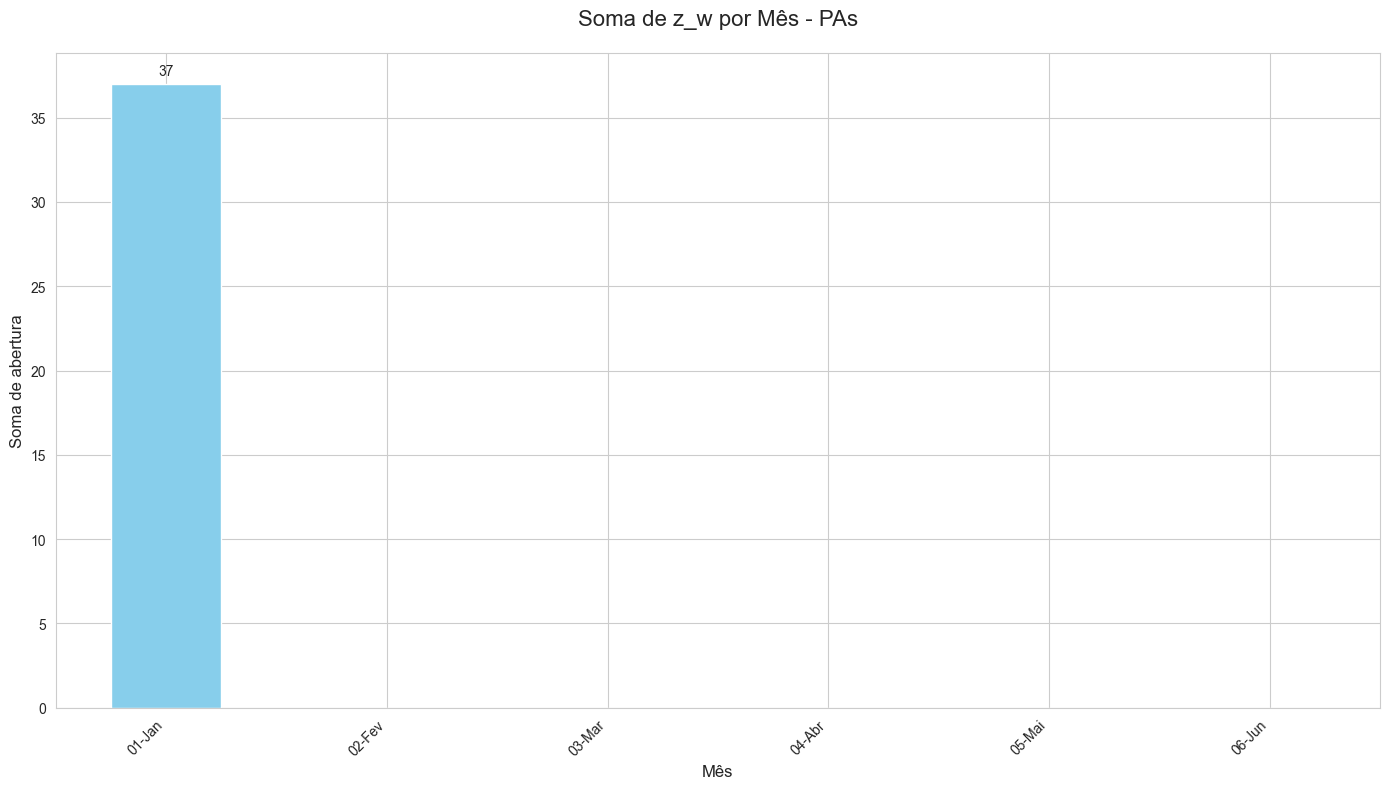

In [47]:
df_pa = df.loc[df['Ref'] == 'PA']

# Agrupar por mês ('Mes') e calcular a soma da coluna 'z_w' para cada mês
monthly_data = df_pa[['Mes', 'Origem', 'z_w']].drop_duplicates().groupby(['Mes'])['z_w'].sum()

# Supondo que 'df' seja o seu DataFrame carregado

df_pa = df.loc[df['Ref'] == 'PA']

# Agrupar por mês ('Mes') e calcular a soma da coluna 'z_w' para cada mês
monthly_data = df_pa[['Mes', 'Origem', 'z_w']].drop_duplicates().groupby(['Mes'])['z_w'].sum()

# Criar a figura e os eixos do gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plotar o gráfico de barras
ax = monthly_data.plot(kind='bar', color='skyblue')

# Adicionar rótulos de dados
for p in ax.patches:
    if p.get_height() > 0:
        # Adiciona o rótulo acima da barra
        ax.annotate(f'{p.get_height():.0f}',  # Formata o valor (opcional: .2f para 2 casas decimais)
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # Deslocamento vertical do texto (ajuste conforme necessário)
                textcoords='offset points')

# Definir o título do gráfico, rótulos dos eixos e outras configurações
plt.title('Soma de z_w por Mês - PAs', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Soma de abertura', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# Exibir o gráfico
plt.show()

In [48]:
df_plot = df.loc[df['Ref']!='Fabrica', ['Ref', 'Origem', 'lat_origem', 'lon_origem', 'uf_origem', 'cid_origem', 'z_w']].drop_duplicates()
df_plot = df_plot.reset_index(drop=True)
df_cidades = pd.read_csv(rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Dados Gerados Mestrado\Auxiliar\df_cluster_pa_cities.csv',\
                          encoding='utf-8', sep=',', )
df_cidades = df_cidades.loc[~df_cidades['nome_cidade'].isin(df_plot['cid_origem'].unique()), :].drop_duplicates().reset_index(drop=True)
df_cidades = df_cidades.rename(columns={'nome_cidade': 'cid_origem', 'latitude_cidade': 'lat_origem', 'longitude_cidade': 'lon_origem'})

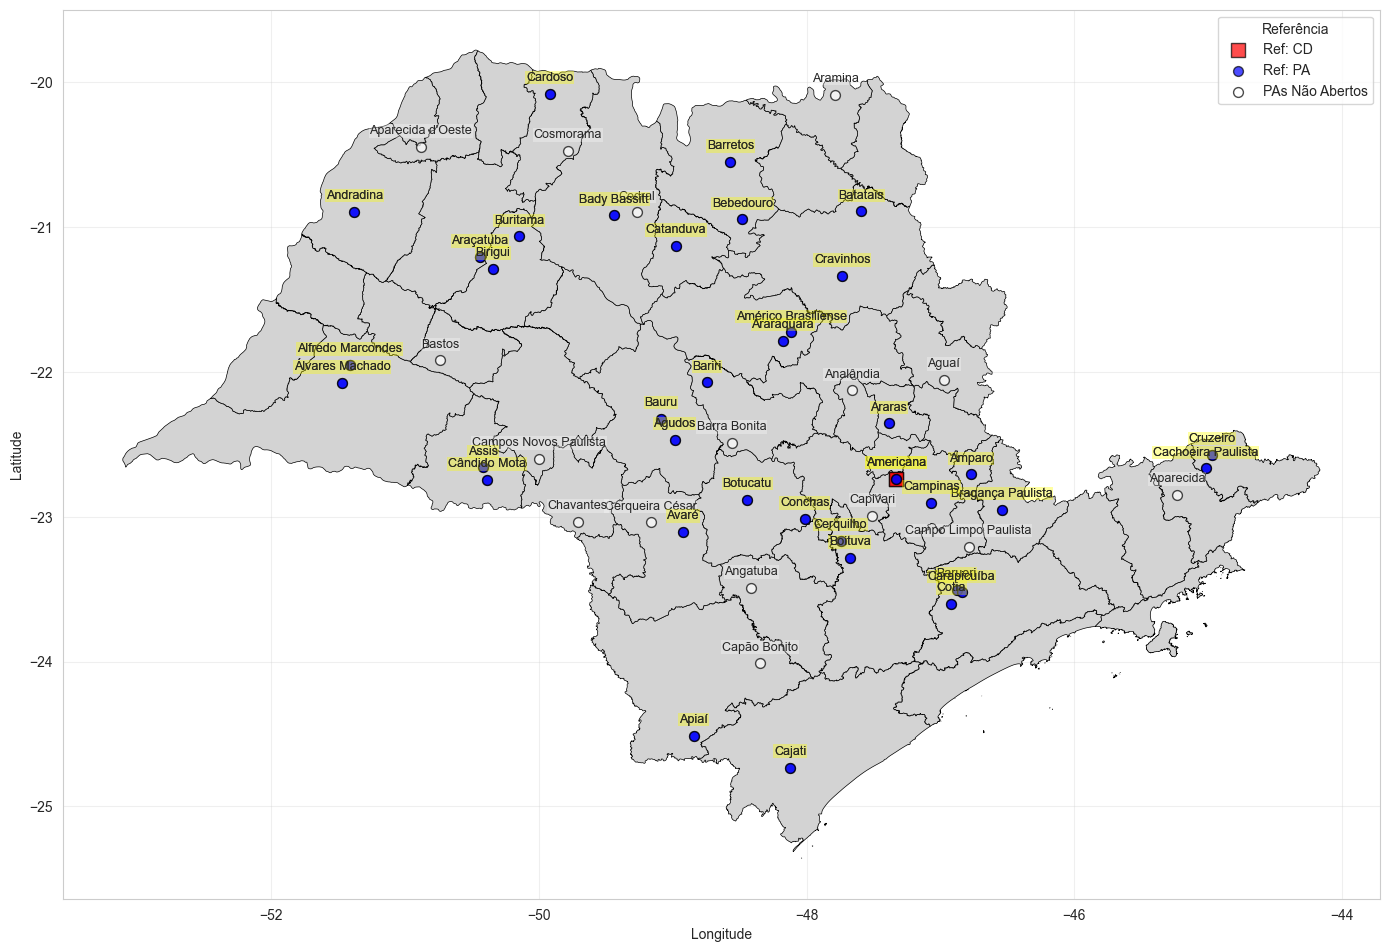

In [49]:
import matplotlib.pyplot as plt

def plotar_grafico(df, df_cidades):
    # Configurações de estilo
    ref_config = {
        'CD': {'color': 'red', 'marker': 's', 'size': 100, 'label_color': 'yellow'},
        'PA': {'color': 'blue', 'marker': 'o', 'size': 50, 'label_color': 'yellow'},
        # Padrão para Refs não especificadas
        'default': {'color': 'gray', 'marker': 'o', 'size': 50, 'label_color': 'yellow'}
    }
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Lista para armazenar handles da legenda
    legend_handles = []
    
    def plot_group(data, is_city=False):
        for ref, group in data.groupby('Ref' if not is_city else 'cid_origem'):
            config = ref_config.get(ref, ref_config['default']) if not is_city else {
                'color': 'white',
                'marker': 'o',
                'size': 50,
                'label_color': 'white'
            }
            
            # Criar scatter plot com label para legenda
            if not is_city:
                scatter = plt.scatter(
                    group['lon_origem'], 
                    group['lat_origem'],
                    c=config['color'],
                    marker=config['marker'],
                    s=config['size'],
                    edgecolor='black',
                    label=f'Ref: {ref}',
                    alpha=0.7
                )
                legend_handles.append(scatter)
            else:
                plt.scatter(
                    group['lon_origem'], 
                    group['lat_origem'],
                    c=config['color'],
                    marker=config['marker'],
                    s=config['size'],
                    edgecolor='black',
                    alpha=0.7
                )
            
            # Adicionar labels de texto
            for _, row in group.iterrows():
                plt.text(
                    row['lon_origem'],
                    row['lat_origem'] + 0.09,
                    row['cid_origem'],
                    fontsize=9,
                    ha='center',
                    bbox=dict(
                        facecolor=config['label_color'],
                        alpha=0.3 if is_city else 0.2,
                        edgecolor='none',
                        pad=0.5
                    )
                )
    
    # Plotar grupos
    plot_group(df_cidades, is_city=True)
    plot_group(df)
    
    # Adicionar entrada para cidades na legenda
    city_scatter = plt.scatter([], [], c='white', marker='o', s=50, 
                              edgecolor='black', label='PAs Não Abertos', alpha=0.7)
    legend_handles.append(city_scatter)
    
    # Configurações finais
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.title('CDs, PAs e PAs Não Abertos - Localização por Origem', fontsize=16, pad=20)
    
    # Criar legenda com os handles coletados
    plt.legend(handles=legend_handles, title='Referência', loc='best')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_grafico(df_plot, df_cidades)

In [50]:
print(sorted(list(df_cidades.loc[~df_cidades['cid_origem'].isin(df_plot['cid_origem'].unique()), 'cid_origem'].unique())))

['Aguaí', 'Analândia', 'Angatuba', 'Aparecida', "Aparecida d'Oeste", 'Aramina', 'Barra Bonita', 'Bastos', 'Campo Limpo Paulista', 'Campos Novos Paulista', 'Capivari', 'Capão Bonito', 'Cedral', 'Cerqueira César', 'Chavantes', 'Cosmorama']


In [51]:
print(sorted(list(df_plot['cid_origem'].unique())))

['Agudos', 'Alfredo Marcondes', 'Americana', 'Amparo', 'Américo Brasiliense', 'Andradina', 'Apiaí', 'Araraquara', 'Araras', 'Araçatuba', 'Assis', 'Avaré', 'Bady Bassitt', 'Bariri', 'Barretos', 'Barueri', 'Batatais', 'Bauru', 'Bebedouro', 'Birigui', 'Boituva', 'Botucatu', 'Bragança Paulista', 'Buritama', 'Cachoeira Paulista', 'Cajati', 'Campinas', 'Carapicuíba', 'Cardoso', 'Catanduva', 'Cerquilho', 'Conchas', 'Cotia', 'Cravinhos', 'Cruzeiro', 'Cândido Mota', 'Álvares Machado']


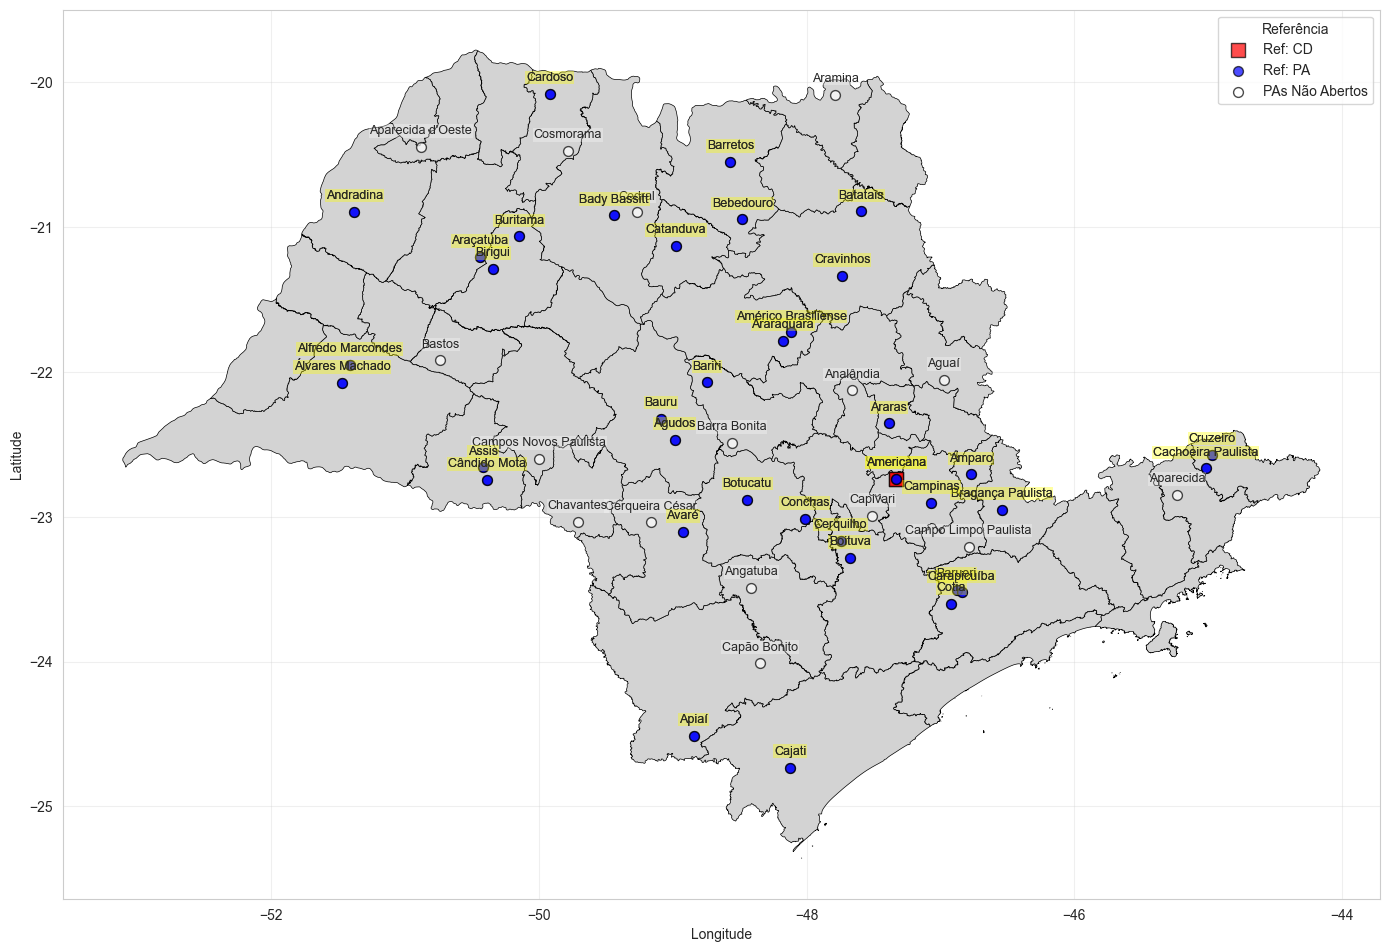

In [52]:
plotar_grafico(df_plot, df_cidades)

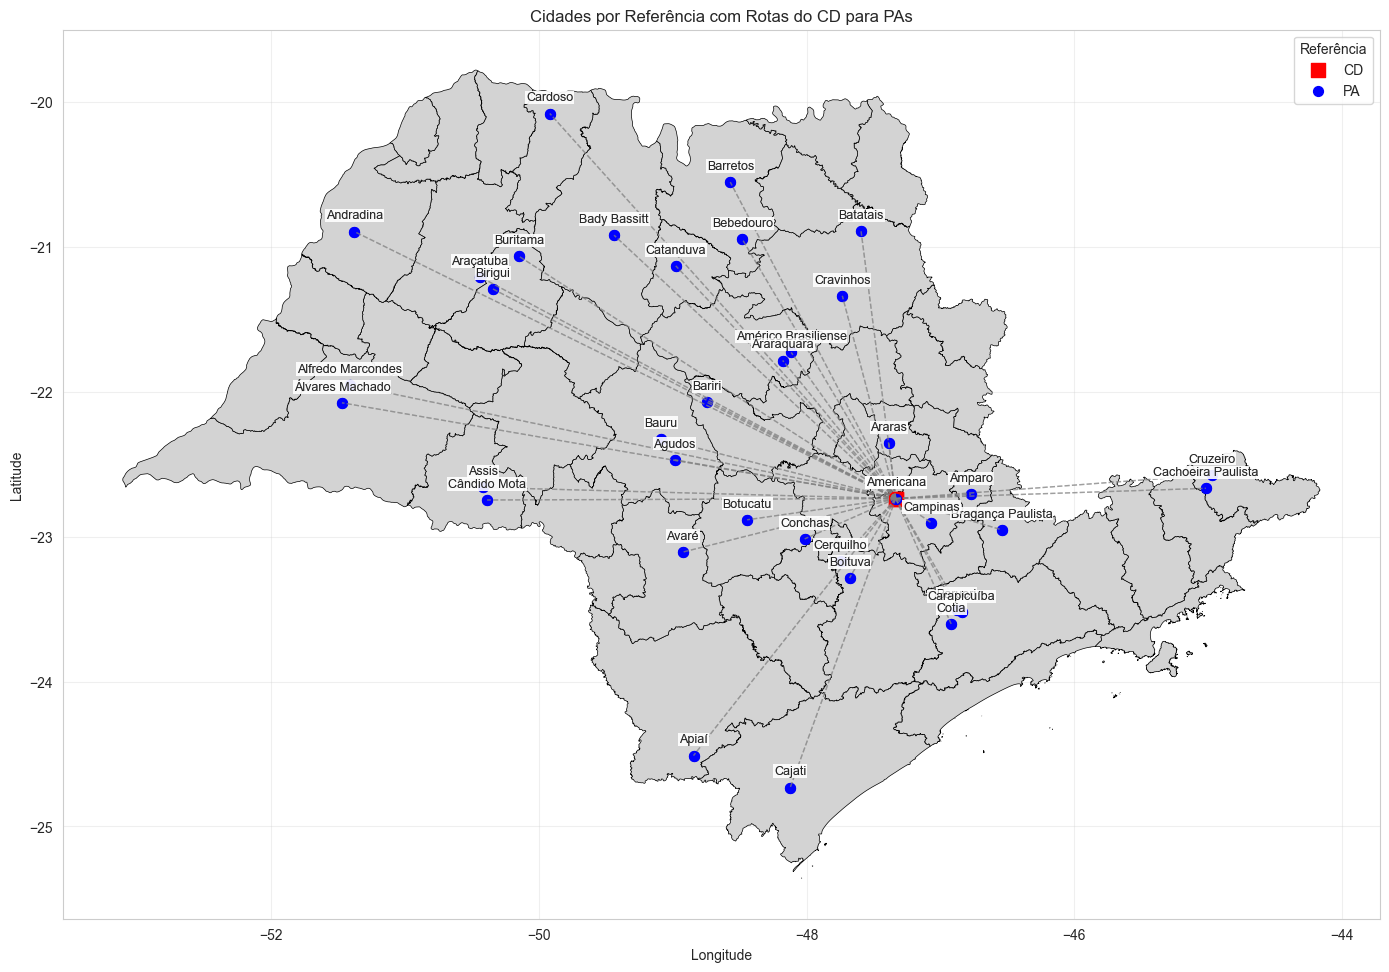

In [53]:
def plotar_grafico_traço(df):
    # Dicionário de cores para cada Ref
    ref_cores = {
        'CD': 'red',
        'PA': 'blue',
        # Adicione outras Refs e cores conforme necessário
    }
    
    # Dicionário de marcadores para cada Ref
    ref_markers = {
        'CD': 's',  # quadrado
        'PA': 'o',  # círculo
        # Adicione outros marcadores conforme necessário
    }

    ref_size = {
        'CD': 100,
        'PA': 50,
        # Adicione outros tamanhos conforme necessário
    }
    
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Encontrar as coordenadas do CD
    cd_data = df[df['Ref'] == 'CD']
    if not cd_data.empty:
        cd_lon = cd_data['lon_origem'].iloc[0]
        cd_lat = cd_data['lat_origem'].iloc[0]
    
    # Plotar cada grupo separadamente
    for ref, group in df.groupby('Ref'):
        scatter = plt.scatter(
            group['lon_origem'], 
            group['lat_origem'],
            c=ref_cores.get(ref, 'gray'),
            marker=ref_markers.get(ref, 'o'),
            s=ref_size.get(ref, 50),
            label=ref
        )
        
        # Adicionar rótulos das cidades
        for _, row in group.iterrows():
            plt.text(
                row['lon_origem'], 
                row['lat_origem'] + 0.09,  # Ajuste vertical para evitar sobreposição
                row['cid_origem'],          # Nome da cidade
                fontsize=9,                 # Tamanho da fonte
                ha='center',                 # Alinhamento horizontal
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.5)
            )
            
            # Desenhar linhas do CD para os PAs
            if ref == 'PA' and not cd_data.empty:
                plt.plot(
                    [cd_lon, row['lon_origem']],
                    [cd_lat, row['lat_origem']],
                    color='gray',
                    linestyle='--',
                    linewidth=1,
                    alpha=0.5
                )
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Cidades por Referência com Rotas do CD para PAs')
    plt.legend(title='Referência')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plotar_grafico_traço(df_plot)

In [54]:
df_info_zd = df_dist_ZD_PA.iloc[:,1:5].rename(columns={'latitude_cidade': 'lat_zd', 'longitude_cidade': 'lon_zd'})
df_teste = df.loc[(df['Origem'].str.startswith('PA')) & (df['Destino'].str.startswith('ZD')) &
                (df['b_rota']==1), ['Origem', 'Destino', 'lat_origem', 'lon_origem']].drop_duplicates().reset_index(drop=True)
df_teste = pd.merge(df_teste, df_info_zd, left_on='Destino', right_on='ZD', how='left')

In [55]:
df_teste = pd.merge(df_teste, df_plot.loc[:, ['Origem', 'cid_origem']], left_on='Origem', right_on='Origem', how='left')

In [56]:
df_teste.head()

,Origem,Destino,lat_origem,lon_origem,nome_cidade,lat_zd,lon_zd,ZD,cid_origem
0,PA_0002,ZD_0002,-22.4694,-48.9863,Agudos,-22.4694,-48.9863,ZD_0002,Agudos
1,PA_0002,ZD_0002,-22.4694,-48.9863,Agudos,-22.4694,-48.9863,ZD_0002,Agudos
2,PA_0002,ZD_0018,-22.4694,-48.9863,Araras,-22.3572,-47.3842,ZD_0018,Agudos
3,PA_0002,ZD_0018,-22.4694,-48.9863,Araras,-22.3572,-47.3842,ZD_0018,Agudos
4,PA_0002,ZD_0029,-22.4694,-48.9863,Bastos,-21.9210,-50.7357,ZD_0029,Agudos


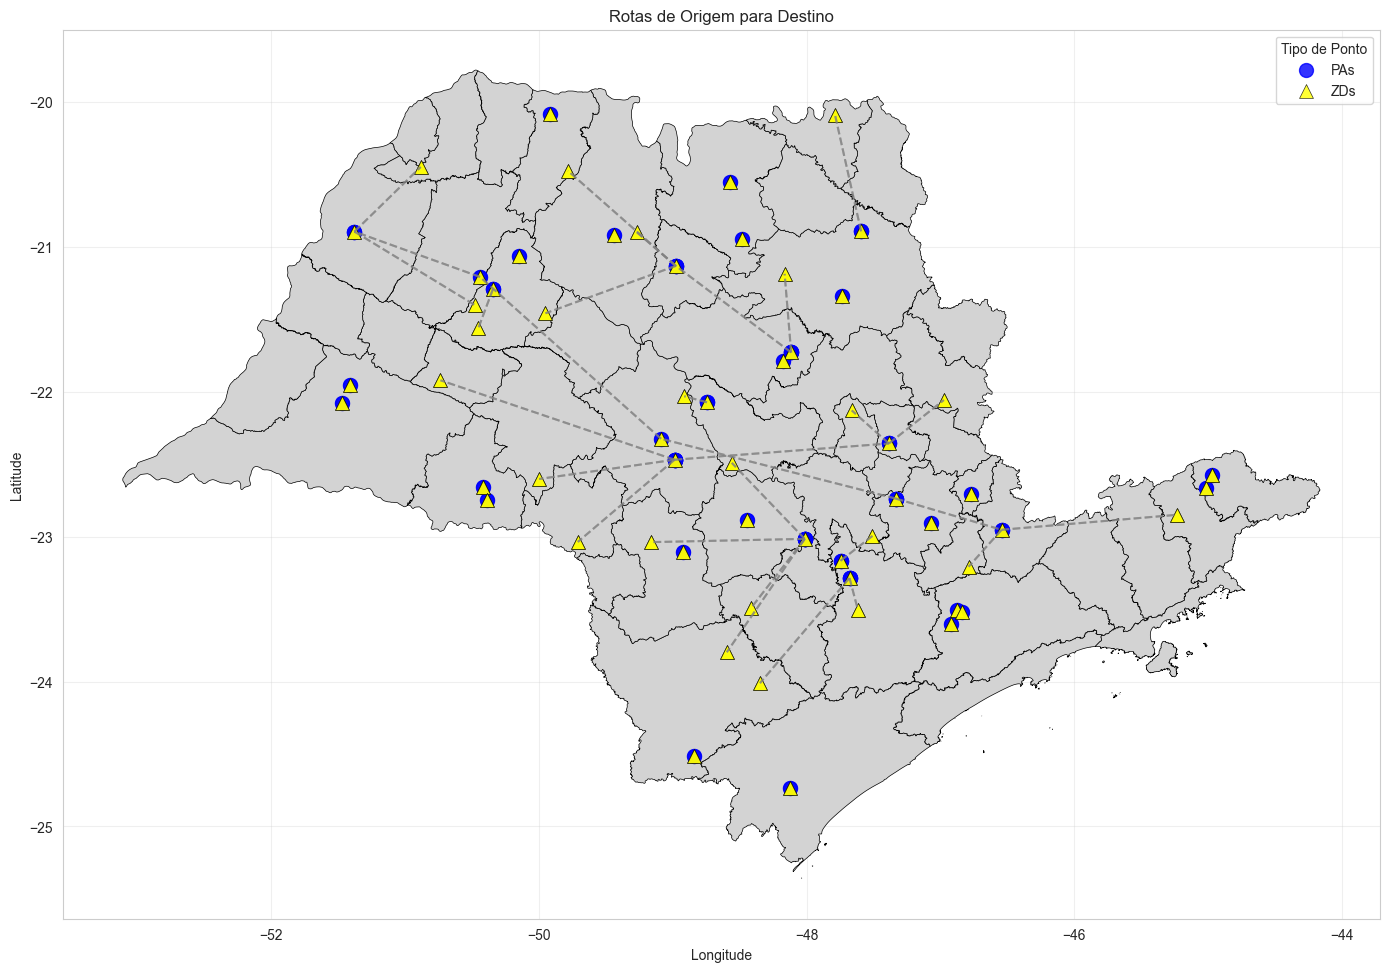

In [57]:
def plotar_grafico_traço(df):
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Plotar pontos de Origem (círculo azul)
    scatter_origem = plt.scatter(
        df['lon_origem'], 
        df['lat_origem'],
        c='blue',
        marker='o',
        s=100,
        label="PAs",
        alpha=0.8
    )
    
    # Plotar pontos de Destino (triângulo amarelo)
    scatter_destino = plt.scatter(
        df['lon_zd'], 
        df['lat_zd'],
        c='yellow',
        marker='^',
        s=100,
        label='ZDs',
        alpha=0.8,
        edgecolors='black',
        linewidth=0.5
    )
    
    # # Adicionar rótulos das origens (Origem + nome_cidade)
    # for _, row in df.iterrows():
    #     plt.text(
    #         row['lon_origem'], 
    #         row['lat_origem'] + 0.09,
    #         f"{row['Origem']}", # f"{row['Origem']} - {row['nome_cidade']}",
    #         fontsize=9,
    #         ha='center',
    #         bbox=dict(facecolor='lightblue', alpha=0.7, edgecolor='none', pad=0.5)
    #     )
    
    # # Adicionar rótulos dos destinos (Destino + cid_origem)
    # for _, row in df.iterrows():
    #     plt.text(
    #         row['lon_zd'], 
    #         row['lat_zd'] + 0.09,
    #         f"{row['Destino']}", # f"{row['Destino']} - {row['cid_origem']}"
    #         fontsize=9,
    #         ha='center',
    #         bbox=dict(facecolor='lightyellow', alpha=0.7, edgecolor='none', pad=0.5)
    #     )
    
    # Desenhar linhas tracejadas de origem para destino
    for _, row in df.iterrows():
        plt.plot(
            [row['lon_origem'], row['lon_zd']],
            [row['lat_origem'], row['lat_zd']],
            color='gray',
            linestyle='--',
            linewidth=1.5,
            alpha=0.6
        )
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Rotas de Origem para Destino')
    plt.legend(title='Tipo de Ponto')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_grafico_traço(df_teste)

In [58]:
df.loc[(df['Ref'] == 'PA') &
       (df['Abrv Var'] == 'qaj')].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Abrv Var'])['Valor'].sum().sort_values(ascending=False)

Ref  Origem   uf_origem  cid_origem           Abrv Var
PA   PA_0036  SP         Campinas             qaj         18763.0
     PA_0005  SP         Americana            qaj         17164.0
     PA_0042  SP         Carapicuíba          qaj          8835.0
     PA_0024  SP         Barueri              qaj          6148.0
     PA_0051  SP         Cotia                qaj          5765.0
     PA_0016  SP         Araraquara           qaj          4014.0
     PA_0002  SP         Agudos               qaj          3823.0
     PA_0027  SP         Bauru                qaj          3622.0
     PA_0006  SP         Américo Brasiliense  qaj          3250.0
     PA_0032  SP         Bragança Paulista    qaj          2907.0
     PA_0030  SP         Boituva              qaj          2677.0
     PA_0026  SP         Batatais             qaj          2218.0
     PA_0031  SP         Botucatu             qaj          2149.0
     PA_0047  SP         Cerquilho            qaj          2127.0
     PA_0029  SP     

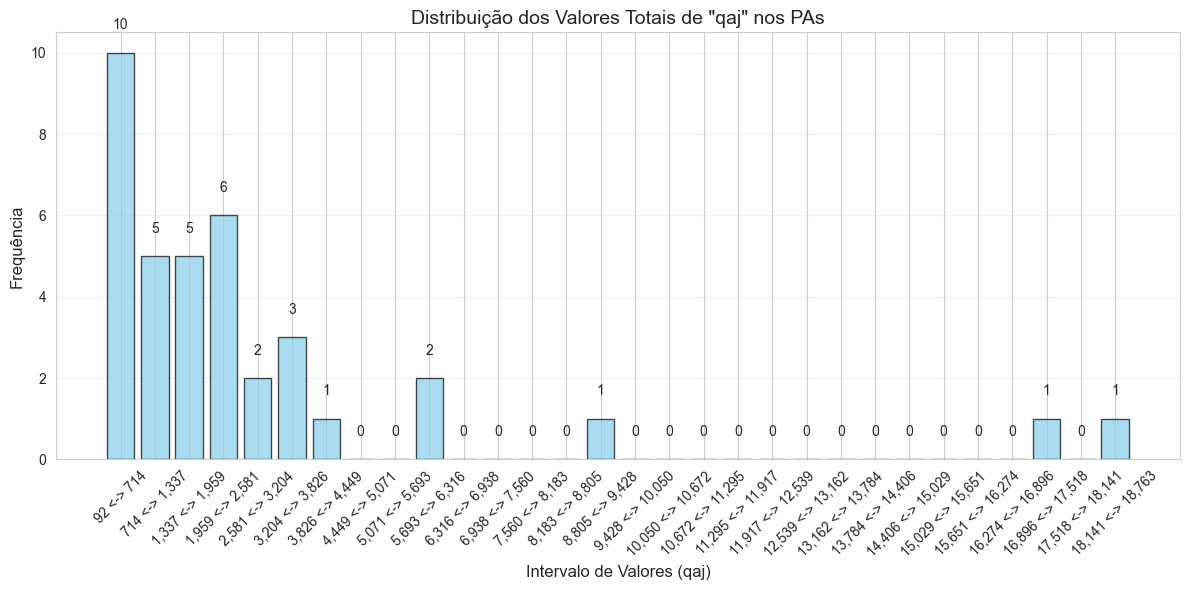

In [59]:
# Filtrar e preparar os dados (como antes)
dados_pa_qaj = df.loc[
    (df['Ref'] == 'PA') & 
    (df['Abrv Var'] == 'qaj')
].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Abrv Var'])['Valor'].sum().sort_values(ascending=False)

df_hist = dados_pa_qaj.reset_index()

# Criar bins (intervalos) manualmente para controle
valores = df_hist['Valor']
bins = 30  # Número de barras
hist, bin_edges = np.histogram(valores, bins=bins)

# Definir posições das barras com espaçamento
largura_barra = (bin_edges[1] - bin_edges[0]) * 0.8  # 80% da largura original
posicoes = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) * 0.1  # Centralizar + espaço

# Plotar as barras
plt.figure(figsize=(12, 6))
barras = plt.bar(
    posicoes, 
    hist, 
    width=largura_barra, 
    color='skyblue', 
    edgecolor='black',
    alpha=0.7
)

# Adicionar rótulos em cada barra
for barra, valor in zip(barras, hist):
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # Posição X (centro da barra)
        altura + 0.5,                            # Posição Y (acima da barra)
        f'{int(valor)}',                         # Texto (valor)
        ha='center',                             # Alinhamento horizontal
        va='bottom',                             # Alinhamento vertical
        fontsize=10
    )

# Ajustar eixos e título
plt.xlabel('Intervalo de Valores (qaj)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Valores Totais de "qaj" nos PAs', fontsize=14)
plt.xticks(posicoes, [f'{bin_edges[i]:,.0f} <-> {bin_edges[i+1]:,.0f}' for i in range(bins)], rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [60]:
df.loc[(df['Ref'] == 'CD') & (df['Destino'] == 'PA_0056')].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes', 'Abrv Var'])['Valor'].\
    sum().unstack(level='Mes').applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\1107061188.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sum().unstack(level='Mes').applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


,,,,,Mes
Ref,Origem,uf_origem,cid_origem,Origem,Abrv Var


In [61]:
df.loc[df['Origem'] == 'PA_0066'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\3642971027.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


,,,,Mes
Ref,Origem,uf_origem,cid_origem,Abrv Var


In [62]:
df.loc[df['Origem'] == 'PA_0032'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_11500\1091802412.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                              01-Jan 02-Fev 03-Mar 04-Abr  \
Ref Origem  uf_origem cid_origem        Abrv Var                               
PA  PA_0032 SP        Bragança Paulista qaj         384    387    540    516   
                                        qrc           0      0      0    214   
                                        qrp         332    336    468    448   
                                        sp        3,675  3,624  3,800  3,800   
                                        spbj      1,825  1,438  1,146    912   
                                        sprc      1,850  2,186  2,654  2,888   

Mes                                              05-Mai 06-Jun  
Ref Origem  uf_origem cid_origem        Abrv Var                
PA  PA_0032 SP        Bragança Paulista qaj         624    456  
                                        qrc         935      0  
                                        qrp         540    395  
                                        sp        3,800  3,800  
                                        spbj      1,308    912  
                                        sprc      2,492  2,888